In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense
from tensorflow.keras import Sequential

In [2]:
input_shape=(1,5,5,1)
# batch_size, height, width, number of color channels
x=tf.random.normal(input_shape)

In [3]:
x

<tf.Tensor: shape=(1, 5, 5, 1), dtype=float32, numpy=
array([[[[ 0.54318684],
         [-0.5640928 ],
         [ 0.02404468],
         [ 0.1744624 ],
         [ 0.3403709 ]],

        [[ 1.4609917 ],
         [-0.8690081 ],
         [-0.5613813 ],
         [ 0.8721259 ],
         [-0.31789863]],

        [[ 0.6996455 ],
         [-0.19028214],
         [-0.6660548 ],
         [ 1.4950364 ],
         [-2.184646  ]],

        [[-0.3607114 ],
         [ 1.2092943 ],
         [-0.9625582 ],
         [ 0.20527591],
         [ 0.532947  ]],

        [[ 1.497348  ],
         [ 0.46325836],
         [-0.972996  ],
         [ 1.6959716 ],
         [ 0.02179184]]]], dtype=float32)>

In [4]:
x.shape

TensorShape([1, 5, 5, 1])

In [5]:
l=Conv2D(filters=1,kernel_size=(3,3),strides=(1,1),
         padding='valid',input_shape=input_shape)

In [6]:
l(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[ 0.7774066 ],
         [-0.5199595 ],
         [ 0.4813305 ]],

        [[ 0.04861301],
         [ 0.11480121],
         [ 0.35767773]],

        [[-0.21123362],
         [ 0.838032  ],
         [-1.8287342 ]]]], dtype=float32)>

In [7]:
l.get_weights()

[array([[[[-0.18571451]],
 
         [[-0.08061215]],
 
         [[ 0.5536916 ]]],
 
 
        [[[ 0.1399852 ]],
 
         [[-0.20655444]],
 
         [[-0.4693929 ]]],
 
 
        [[[-0.05330414]],
 
         [[-0.14203537]],
 
         [[-0.2736146 ]]]], dtype=float32),
 array([0.], dtype=float32)]

Veryfying Convolution Operation

In [8]:
w=l.get_weights()[0] 
w

array([[[[-0.18571451]],

        [[-0.08061215]],

        [[ 0.5536916 ]]],


       [[[ 0.1399852 ]],

        [[-0.20655444]],

        [[-0.4693929 ]]],


       [[[-0.05330414]],

        [[-0.14203537]],

        [[-0.2736146 ]]]], dtype=float32)

In [9]:
w.shape

(3, 3, 1, 1)

In [10]:
x[0,:3,:3,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.54318684, -0.5640928 ,  0.02404468],
       [ 1.4609917 , -0.8690081 , -0.5613813 ],
       [ 0.6996455 , -0.19028214, -0.6660548 ]], dtype=float32)>

In [11]:
x_flat=tf.reshape(x[0,:3,:3,0],(9,))
w_flat=tf.reshape(w,(9,))

In [12]:
w_flat

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([-0.18571451, -0.08061215,  0.5536916 ,  0.1399852 , -0.20655444,
       -0.4693929 , -0.05330414, -0.14203537, -0.2736146 ], dtype=float32)>

In [13]:
x_flat

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([ 0.54318684, -0.5640928 ,  0.02404468,  1.4609917 , -0.8690081 ,
       -0.5613813 ,  0.6996455 , -0.19028214, -0.6660548 ], dtype=float32)>

In [14]:
tf.tensordot(x_flat,w_flat,axes=1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7774066>

In [15]:
x

<tf.Tensor: shape=(1, 5, 5, 1), dtype=float32, numpy=
array([[[[ 0.54318684],
         [-0.5640928 ],
         [ 0.02404468],
         [ 0.1744624 ],
         [ 0.3403709 ]],

        [[ 1.4609917 ],
         [-0.8690081 ],
         [-0.5613813 ],
         [ 0.8721259 ],
         [-0.31789863]],

        [[ 0.6996455 ],
         [-0.19028214],
         [-0.6660548 ],
         [ 1.4950364 ],
         [-2.184646  ]],

        [[-0.3607114 ],
         [ 1.2092943 ],
         [-0.9625582 ],
         [ 0.20527591],
         [ 0.532947  ]],

        [[ 1.497348  ],
         [ 0.46325836],
         [-0.972996  ],
         [ 1.6959716 ],
         [ 0.02179184]]]], dtype=float32)>

In [16]:
from tensorflow.keras.layers import MaxPool2D,AveragePooling2D

In [17]:
m=MaxPool2D()
a=AveragePooling2D()

In [18]:
m(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[1.4609917],
         [0.8721259]],

        [[1.2092943],
         [1.4950364]]]], dtype=float32)>

In [19]:
a(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[0.14276941],
         [0.12731293]],

        [[0.3394866 ],
         [0.01792482]]]], dtype=float32)>

## Cat Dog Classifier

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Saurabh\\Deep Learning'

In [4]:
os.chdir('D:\\Edureka\\Deep Learning\\catdog')

In [5]:
os.getcwd()

'D:\\Edureka\\Deep Learning\\catdog'

In [7]:
import zipfile
with zipfile.ZipFile('CatDog.zip','r') as zip_ref:
    zip_ref.extractall()

In [6]:
os.listdir()

['CatDog.zip', 'test_set', 'training_set']

In [7]:
DATA='D:\\Edureka\\Deep Learning\\catdog\\training_set\\training_set'

In [8]:
os.listdir(DATA)

['cats', 'dogs']

In [9]:
DATA

'D:\\Edureka\\Deep Learning\\catdog\\training_set\\training_set'

In [10]:
os.path.join(DATA,'dogs')

'D:\\Edureka\\Deep Learning\\catdog\\training_set\\training_set\\dogs'

In [11]:
DATA

'D:\\Edureka\\Deep Learning\\catdog\\training_set\\training_set'

In [12]:
len((os.listdir(os.path.join(DATA,'dogs'))))

4006

In [13]:
for x in os.listdir(DATA):
    path=os.path.join(DATA,x)
    no=len(os.listdir(path))
    print(f'Path is {path}, and there are {no} images')

Path is D:\Edureka\Deep Learning\catdog\training_set\training_set\cats, and there are 4001 images
Path is D:\Edureka\Deep Learning\catdog\training_set\training_set\dogs, and there are 4006 images


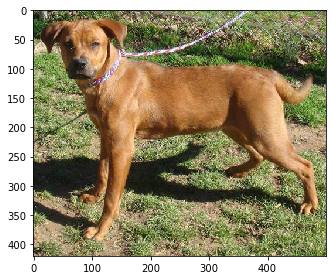

In [14]:
from skimage.io import imshow
imshow('D:\\Edureka\\Deep Learning\\catdog\\training_set\\training_set\\dogs\\dog.55.jpg')
plt.show()

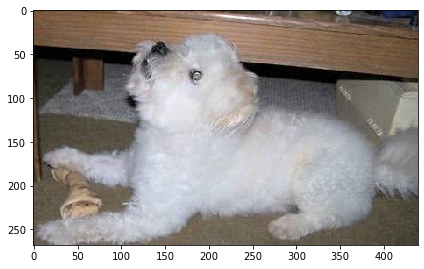

In [15]:
imshow('D:\\Edureka\\Deep Learning\\catdog\\training_set\\training_set\\dogs\\dog.109.jpg')
plt.show()

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory
train_data=image_dataset_from_directory(directory=DATA,
                                       batch_size=32,
                                       image_size=(150,150),
                                       shuffle=True,
                                        seed=10,
                                        validation_split=0.2,
                                        subset='training',
                                       label_mode='binary')

valid_data=image_dataset_from_directory(directory=DATA,
                                       batch_size=32,
                                       image_size=(150,150),
                                       shuffle=True,
                                        seed=10,
                                        validation_split=0.2,
                                        subset='validation',
                                       label_mode='binary')


Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [17]:
train_data.class_names

['cats', 'dogs']

In [46]:
CLASS_IDX = {0:'cats',1:'dogs'}

In [18]:
valid_data.class_names

['cats', 'dogs']

In [19]:
train_data.class_names[1]

'dogs'

GPUs and TPUs can radically reduce the time required to execute a single training step. Achieving peak performance requires an efficient input pipeline that delivers data for the next step before the current step has finished. The tf.data API helps to build flexible and efficient input pipelines.

Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.

In [20]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

#### Preprocessing the Images

Images needs to have the pixel intensity range of 0 to 1

In [21]:
from tensorflow.keras.layers import Flatten,Rescaling,MaxPool2D 

This layer rescales every value of an input (often an image) by multiplying by scale and adding offset.

To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255.

To rescale an input in the [0, 255] range to be in the [-1, 1] range, you would pass scale=1./127.5, offset=-1.

In [22]:
model=Sequential()

model.add(Rescaling(scale=1./255,input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))

model.add(MaxPool2D())

model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
          
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D())
          
model.add(Flatten())    
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=68,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                    

In [23]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(train_data,
          validation_data=valid_data,
          epochs = 5,)

Epoch 1/5
201/201 [==============================] - 184s 915ms/step - loss: 0.4053 - accuracy: 0.8136 - val_loss: 0.6579 - val_accuracy: 0.7233
Epoch 2/5
201/201 [==============================] - 186s 922ms/step - loss: 0.3389 - accuracy: 0.8498 - val_loss: 0.6945 - val_accuracy: 0.7433
Epoch 3/5
201/201 [==============================] - 176s 874ms/step - loss: 0.3099 - accuracy: 0.8676 - val_loss: 0.6676 - val_accuracy: 0.7395
Epoch 4/5
201/201 [==============================] - 177s 883ms/step - loss: 0.2266 - accuracy: 0.9032 - val_loss: 0.8380 - val_accuracy: 0.7077
Epoch 5/5
201/201 [==============================] - 189s 938ms/step - loss: 0.1824 - accuracy: 0.9263 - val_loss: 0.8631 - val_accuracy: 0.7177


### Model Prediction

selecting one new test image

In [25]:
dog='D:\\Edureka\\Deep Learning\\catdog\\test_set\\test_set\\dogs\\dog.4232.jpg'

In [26]:
# tensorflow load the image in PIL format (Python Imaging Library)
# convert to array
# prepare the image as per the expectation
# Generate the prediction

In [28]:
from tensorflow.keras.utils import load_img,img_to_array

In [29]:
pil=load_img(dog,target_size=(150,150)) ## ensure size is as per the model
img=img_to_array_array(pil)
img.shape

(150, 150, 3)

In [33]:
# batch_size, h,w,no color channels
img=img.reshape(1,150,150,3)
img.shape

(1, 150, 150, 3)

In [38]:
model.predict(img)

1/1 [==============================] - 0s 27ms/step


array([[0.99696714]], dtype=float32)

In [45]:
(model.predict(img) > 0.5)

1/1 [==============================] - 0s 27ms/step


array([[ True]])

In [44]:
(model.predict(img) > 0.5).astype('int')

1/1 [==============================] - 0s 27ms/step


array([[1]])

In [47]:
CLASS_IDX 

{0: 'cats', 1: 'dogs'}

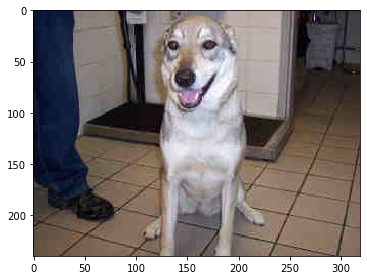

In [50]:
imshow(dog)